In [27]:
using Pkg
# Pkg.add("CSV")
# Pkg.add("Plots")
# Pkg.add("PlotThemes")
# Pkg.add("DataFrames")
# Pkg.add("DataFramesMeta")
# Pkg.add("NPZ")
Pkg.add("JLD")

   Resolving package versions...
   Installed JLD ─ v0.12.3
    Updating `C:\Users\geert\.julia\environments\v1.6\Project.toml`
  [4138dd39] + JLD v0.12.3
    Updating `C:\Users\geert\.julia\environments\v1.6\Manifest.toml`
  [4138dd39] + JLD v0.12.3
Precompiling project...
  ✓ JLD
  ✓ DataFramesMeta
  ✓ Baysor
  3 dependencies successfully precompiled in 19 seconds (251 already precompiled)
  2 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions


In [3]:
import Colors
import CSV
import Plots

using DataFrames
using DataFramesMeta

import Baysor as B;

In [4]:
df_spatial, gene_names = B.load_df("./segmentation.csv")

(141652×11 DataFrame
    Row │ Column1  x          y           gene   molecule_id  confidence  clus ⋯
        │ Int64    Float64    Float64     Int64  Int64        Float64     Int6 ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │       0    56.2121     7.66667      6            1     0.0           ⋯
      2 │       1   920.136      9.54545      6            2     0.0
      3 │       2  1473.3       11.8041       6            3     0.0
      4 │       3   938.4       12.4          6            4     0.0
      5 │       4  1280.59      13.2759       6            5     0.0           ⋯
      6 │       5   836.39      16.2987       6            6     0.0008
      7 │       6   183.481     19.2593       6            7     0.0
      8 │       7   560.976     19.3659       6            8     0.0
      9 │       8   647.478     19.1739       6            9     0.0           ⋯
     10 │       9   976.68      23.14         6           10     0.93474
   

# Plot raw data

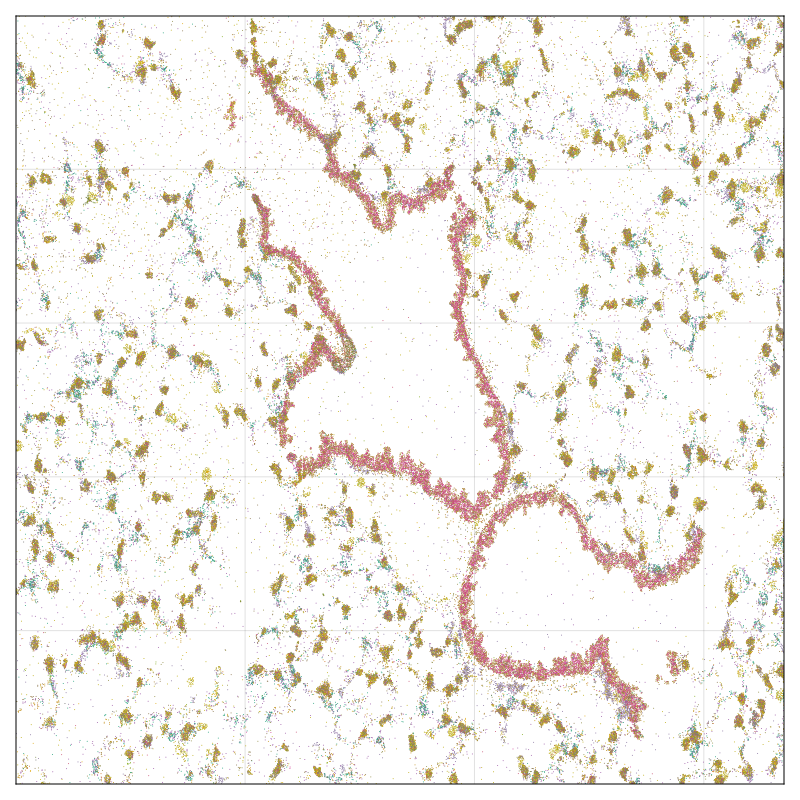

In [8]:
B.plot_molecules(df_spatial, colormap=:Dark2, markersize=1)

# Filter noise

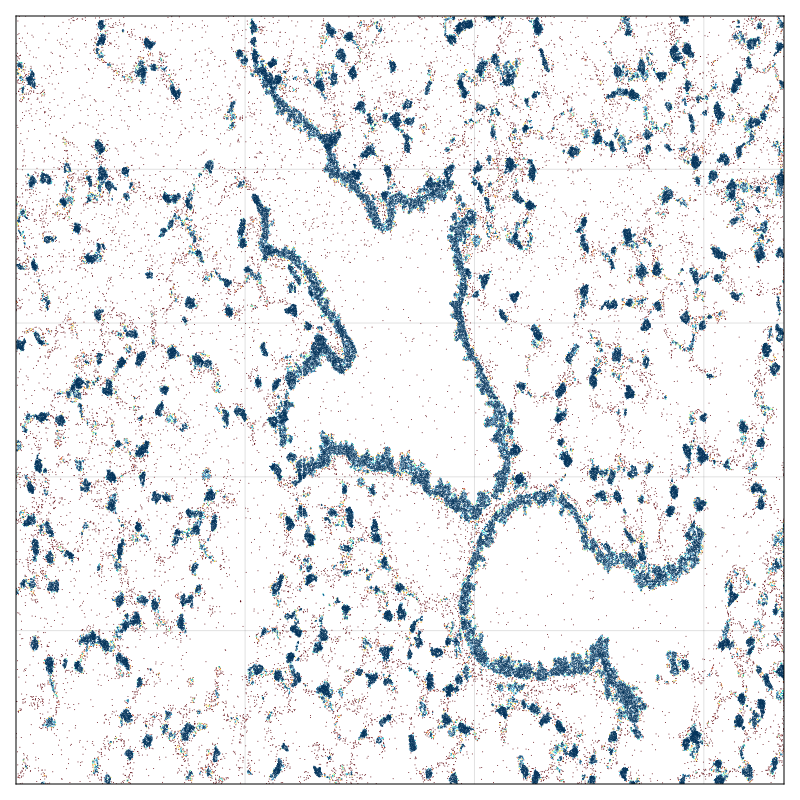

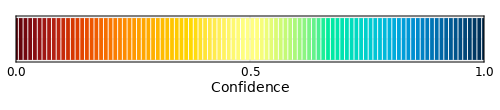

In [9]:
conf_colors = B.map_to_colors(df_spatial.confidence, lims=(0.0, 1.0), palette=Colors.diverging_palette(10,250, s=0.75, w=1.0))
display(B.plot_molecules(df_spatial, color=conf_colors[:colors], markersize=1))
display(B.plot_colorbar(conf_colors, xlabel="Confidence"))

# Segment over regions

┌ Warning: `@where is deprecated, use `@subset`  with `@skipmissing` instead.
└ @ DataFramesMeta C:\Users\geert\.julia\packages\DataFramesMeta\EDzWO\src\macros.jl:586


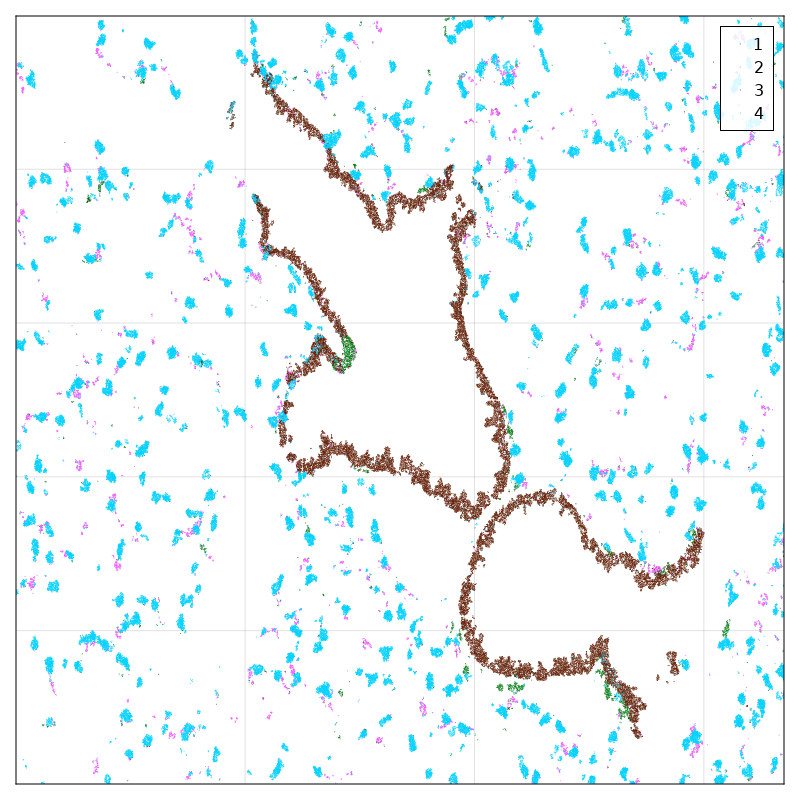

In [16]:
B.plot_molecules(@where(df_spatial, :confidence .> 0.8), annotation=:cluster, markersize=1)

# Segment cells

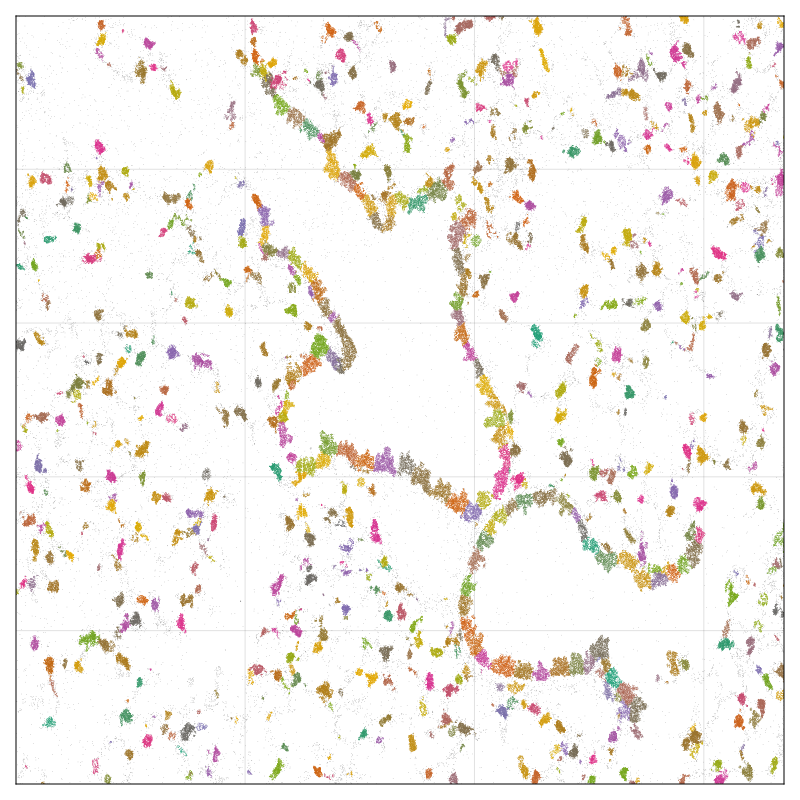

In [17]:
B.plot_molecules(df_spatial, color=B.shuffle_labels(df_spatial.cell), is_noise=(df_spatial.cell .== 0), colormap=:Dark2, markersize=1)

# Estimate local expression patterns

## Visualise expression

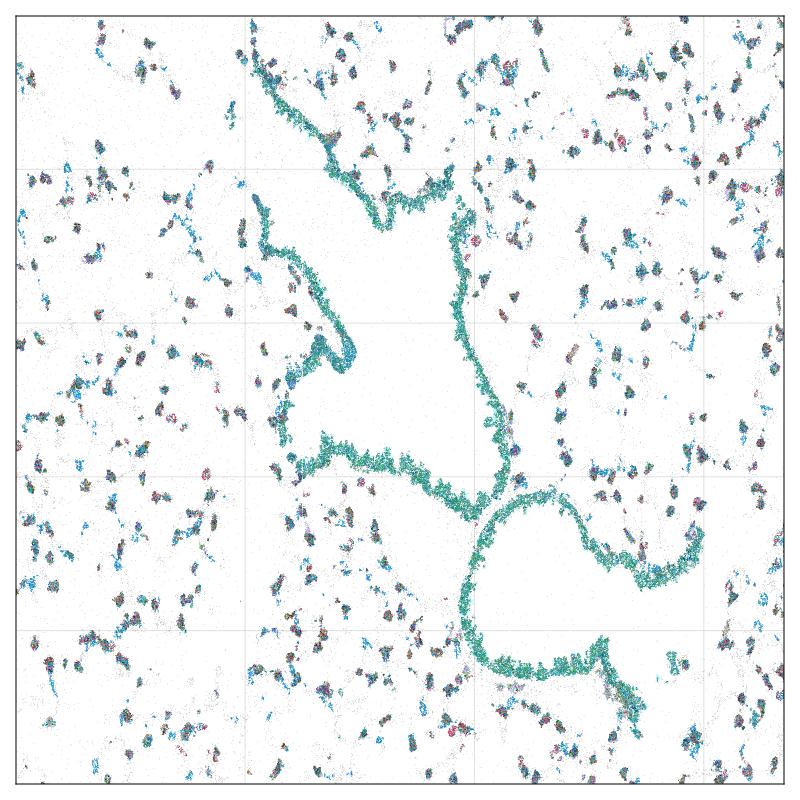

In [18]:
B.plot_molecules(df_spatial, color=:ncv_color, is_noise=(df_spatial.cell .==0), colormap=:Dark2, markersize=1)

## Polygons

In [5]:
polygons = B.boundary_polygons(df_spatial, df_spatial.cell, grid_step=10., bandwidth=5.0);


In [10]:
size(polygons)

(826,)

In [27]:
polygons[1]

8×2 Matrix{Float64}:
  82.5  122.737
  82.5  132.737
  92.5  132.737
 102.5  132.737
 102.5  122.737
 102.5  112.737
  92.5  112.737
  82.5  122.737

In [18]:
pwd()
println(@__DIR__)

C:\Users\geert\Desktop\Baysor


In [ ]:
B.plot_molecules(df_spatial, polygons, color=:ncv_color, is_noise=(df_spatial.cell .== 0), colormap=:Dark2, markersize=1)

## Analyze results

In [21]:
first(df_spatial[:,[:x, :y, :cell, :ncv_color, :cluster, :confidence, :assignment_confidence]], 5)

,x,y,cell,ncv_color,cluster,confidence,assignment_confidence
,Float64,Float64,Int64,String,Int64,Float64,Float64
1,56.2121,7.66667,0,#007CA9,2,0.0,1.0
2,920.136,9.54545,0,#0081AD,2,0.0,1.0
3,1473.3,11.8041,0,#007CA9,2,0.0,1.0
4,938.4,12.4,0,#0087B1,2,0.0,1.0
5,1280.59,13.2759,0,#007CA9,2,0.0,1.0


In [23]:
cell_stat_df = DataFrame(CSV.File("segmentation_cell_stats.csv"))
first(cell_stat_df, 5)

,cell,x,y,cluster,n_transcripts,density,elongation,area,avg_confidence
,Int64,Float64,Float64,Int64,Int64,Float64,Float64,Float64,Float64
1,1,90.997,114.549,4,8,0.1209,19.98,66.19,0.9485
2,2,237.204,9.64873,4,11,0.06603,4.475,166.6,0.9302
3,3,296.884,403.085,4,105,0.02145,2.433,4894.0,0.938
4,4,803.0,31.8616,4,83,0.03317,1.294,2502.0,0.9769
5,5,695.897,117.508,2,71,0.01637,3.452,4337.0,0.8244
